계단 함수 구현
하지만 x는 실수만 받음 => 넘파이 배열 X

In [1]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

넘파이 배열이 가능한 함수

In [2]:
import numpy as np

def step_function(x):
    y = x > 0 # 예시의 경우 [false,false,true]로 반환
    return y.astype(int) # 배열을 [0,0,1]로 반환 

In [3]:
x = np.array([-1.0, 0, 2.0])
result = step_function(x)
print(result)

[0 0 1]


계단 함수 그래프

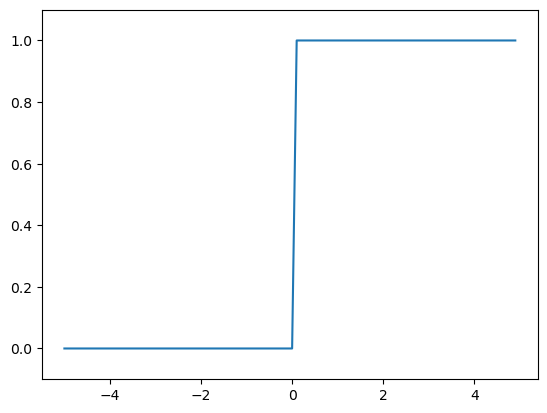

In [4]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype= int)

x = np.arange(-5.0,5.0,0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1) # y축 범위 지정
plt.show()

시그모이드 함수 구현

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

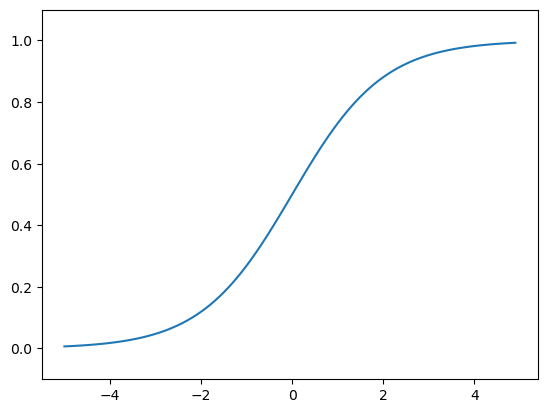

In [6]:
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1) # y축 범위
plt.show()

계단 함수 vs 시그모이드 함수

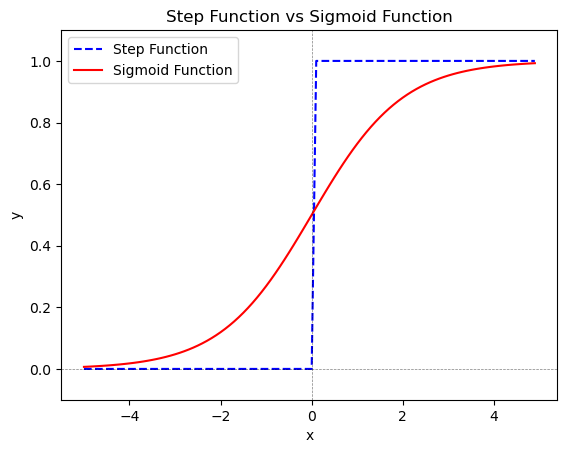

In [7]:
import numpy as np
import matplotlib.pylab as plt

# 계단 함수 정의
def step_function(x):
    return np.array(x > 0, dtype=int)

# 시그모이드 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# x 값 생성
x = np.arange(-5.0, 5.0, 0.1)

# y 값 계산
y_step = step_function(x)
y_sigmoid = sigmoid(x)

# 그래프 그리기
plt.plot(x, y_step, linestyle='--', color='blue', label='Step Function')  # 계단 함수
plt.plot(x, y_sigmoid, linestyle='-', color='red', label='Sigmoid Function')  # 시그모이드 함수

# 그래프 설정
plt.ylim(-0.1, 1.1)  # y축 범위 지정
plt.axhline(0, color='black', linewidth=0.5, linestyle='--', alpha=0.5)  # x축 표시
plt.axvline(0, color='black', linewidth=0.5, linestyle='--', alpha=0.5)  # y축 표시
plt.legend()  # 범례 표시
plt.title("Step Function vs Sigmoid Function")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

ReLU 함수

In [8]:
def relu(x):
    return np.maximum(0,x)

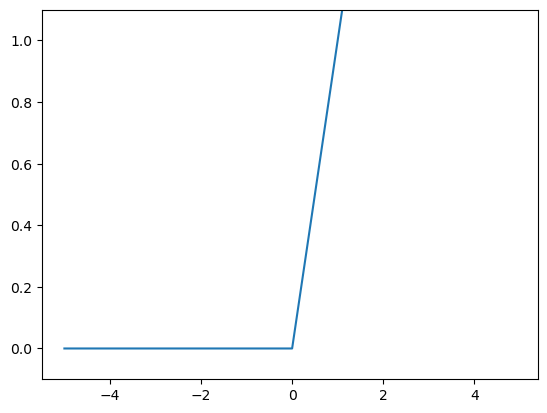

In [9]:
x = np.arange(-5.0,5.0,0.1)
y = relu(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1) # y축 범위
plt.show()

행렬의 곱셈 

In [10]:
A = np.array([[1,2],[3,4]])
A.shape

(2, 2)

In [11]:
B = np.array([[5,6],[7,8]])
B.shape

(2, 2)

In [12]:
np.dot(A,B) # 행렬 곱

array([[19, 22],
       [43, 50]])

In [13]:
A = np.array([[1,2,3],[4,5,6]])
A.shape
B = np.array([[1,2],[3,4],[5,6]])
B.shape
np.dot(A,B)

array([[22, 28],
       [49, 64]])

In [14]:
A = np.array([[1,2],[3,4],[5,6]])
A.shape
B= np.array([7,8])
B.shape

np.dot(A,B)

array([23, 53, 83])

In [15]:
X = np.array([1,2])
X.shape
W = np.array([[1,3,5],[2,4,6]])
W.shape

Y = np.dot(X,W)
print(Y)

[ 5 11 17]


각 층의 신호 전달 구현

In [16]:
X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X,W1) + B1

(2, 3)
(2,)
(3,)


In [17]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [18]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [19]:
def identitity_function(x): # 항등 함수(흐름 통일일)
    return x

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2,W3) + B3
Y = identitity_function(A3)

모든 구현 정리 

In [20]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def identity_function(x):
    return x

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3)+b3
    y = identity_function(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


소프트맥스 함수

In [21]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [22]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

손글씨 숫자 인식

In [23]:
import sys, os
sys.path.append("D:\coding\Deep Learning from Scratch\deeplearning_from_scratch-master\dataset")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

#각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [24]:
import sys, os
sys.path.append("D:\coding\Deep Learning from Scratch\deeplearning_from_scratch-master\dataset")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28,28) #원래 이미지의 모양으로 변형
print(img.shape)
img_show(img)

5
(784,)
(28, 28)


신경망 추론 처리

In [25]:
import pickle

def get_data():
    (x_train, t_train), (x_test,t_test) = \
        load_mnist(normalize=True,flatten=True,one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network,x):
    W1,W2,W3 = network['W1'], network['W2'], network['W3']
    b1,b2,b3 = network['b1'], network['b2'], network['b3'] 

    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)

    a3 = np.dot(z2,W3) + b3
    y = softmax(a3)

    return y



In [26]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy: "+ str(float(accuracy_cnt) / len(x)))


Accuracy: 0.9352


배치 처리 

In [28]:
x, _ = get_data()
network = init_network()
W1,W2,W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


배치

In [29]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치의 크기 
accuracy_cnt = 0

for i in range(0,len(x),batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network,x_batch)
    p = np.argmax(y_batch,axis= 1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


range 연습 

In [31]:
print(list(range(0,10)))
print(list(range(0,10,3)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 3, 6, 9]


argmax() 연습

In [33]:
x = np.array([[0.1,0.8,0.1],[0.3,0.1,0.6],
              [0.2,0.5,0.3],[0.8,0.1,0.1]])

y = np.argmax(x, axis = 1)
print(y)

[1 2 1 0]


In [ ]:
print(list(range(0,10)))
print(list(range(0,10,3)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 3, 6, 9]


배치 비교

In [34]:
y = np.array([1,2,1,0])
t = np.array([1,2,0,0])

print(y == t)
print(np.sum(y==t))

[ True  True False  True]
3
